<a href="https://colab.research.google.com/github/juridicodiniz/devai/blob/main/Atividade_5_Aprendizado_semi_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aprendizado semi-supervisionado**

Usando o notebook em postre/aula9a_aprendizado_semi_supervisionado.ipynb at main · fboldt/postre (github.com) como inspiração, use outro algoritmo de agrupamento (clusterização), que não seja o KMeans, para escolher exemplos representativos da base mnist e para propagar os rótulos desses exemplos.

Compare o resultado do score de uma Regressão Logística com o dataset completo e com algumas amostras aleatórias.

In [30]:
from keras.datasets import mnist

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt



# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convertendo imagens 28x28 para vetores de 784 elementos
X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

# Normalizando os dados
X_train /= 255.0


print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [31]:
#Usando a regressão logistica
from sklearn.linear_model import LogisticRegression

#Supondo 50 y, que serão os 50  primerios
n_labeled = 50

#Interação maxima de 10 mil
log_reg = LogisticRegression(max_iter=10_000)

#Terinando a regressão Logistica
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [21]:
log_reg.score(X_test, y_test)

0.6295

In [37]:
#Usando o DBSCAN para agrupar e formar os cluster ******************************************
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade com PCA para acelerar o DBSCAN
#usando 50 clustes
k = 50
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_train)


# Aplicando o DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

X_mnist_dist = dbscan.fit_predict(X_pca)

#Pegando o indice dos que estão mais proximos do centro
representative_mnist_idx = X_mnist_dist.argmin(axis=0)

#Pegando os elementos dos indices dos que estão mais proximos do centro
X_representative_mnist = X_train[representative_mnist_idx]


[array([ 0.48599187, -1.2261349 , -0.09612127, -2.1794155 , -0.10714222,
       -0.9116867 ,  0.9175608 ,  0.626612  , -1.4256049 ,  0.7780868 ,
        0.7745419 , -0.99624974, -0.44504365,  2.938369  ,  0.85979897,
       -0.01840516,  1.2946978 ,  1.2124417 ,  1.0886133 ,  0.65234673,
        0.10795914, -0.2524149 , -0.85173994,  0.9813292 ,  0.18091084,
        0.39349225, -1.2076544 ,  0.6670995 , -0.49216405, -0.48389745,
       -0.38494664,  0.13553207,  0.4205497 ,  0.33221078, -0.59617144,
        0.78646326,  0.2517043 ,  0.7837184 ,  0.6179214 , -1.4101894 ,
        0.7243407 ,  0.603563  , -0.15017045, -0.34656727, -0.4965858 ,
        0.01305248,  0.48356292, -0.3634888 ,  0.14447907,  0.15204285],
      dtype=float32), array([ 1.5399228 ,  0.28374887, -0.794344  ,  0.74630237,  2.0303326 ,
       -1.1887152 ,  1.7684007 , -0.77489   ,  3.6898873 ,  1.7449251 ,
        1.8745142 , -0.3405468 , -0.04912151,  1.0707104 ,  0.6915211 ,
        1.030454  ,  1.5076425 , -0.5442

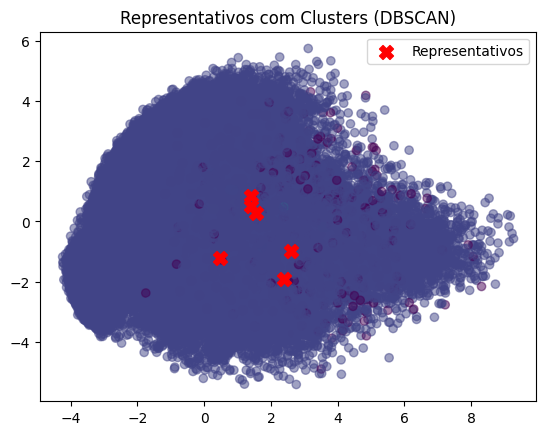

In [40]:
# Visualizando alguns exemplos representativos de cada cluster com DBSCAN
unique_labels = set(labels)
representative_samples = []

for label in unique_labels:
    cluster_samples = X_pca[labels == label]
    representative_samples.append(cluster_samples[0])  # Escolhendo o primeiro exemplo de cada cluster
print(representative_samples)

# Visualizando os representantes no espaço reduzido
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter([sample[0] for sample in representative_samples],
            [sample[1] for sample in representative_samples],
            c='red', marker='X', s=100, label='Representativos')
plt.title('Representativos com Clusters (DBSCAN)')
plt.legend()
plt.show()